In [51]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

BATCH_SIZE = 32
IMAGE_SIZE = (500, 200)
CHANNELS = 3


In [52]:
from google.colab import drive
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"/content/drive/MyDrive/MFCC MAIN DATASET",
seed=123,
shuffle=True,
image_size=(500,200),
batch_size=BATCH_SIZE
)

Found 1000 files belonging to 2 classes.


In [54]:
# Split the dataset into train and test sets
train_ds = dataset.take(int(0.9 * len(dataset)))
test_ds = dataset.skip(int(0.9 * len(dataset)))

In [55]:
class_names = dataset.class_names

# Print the class names
print(class_names)

['ADULT', 'CHILD']


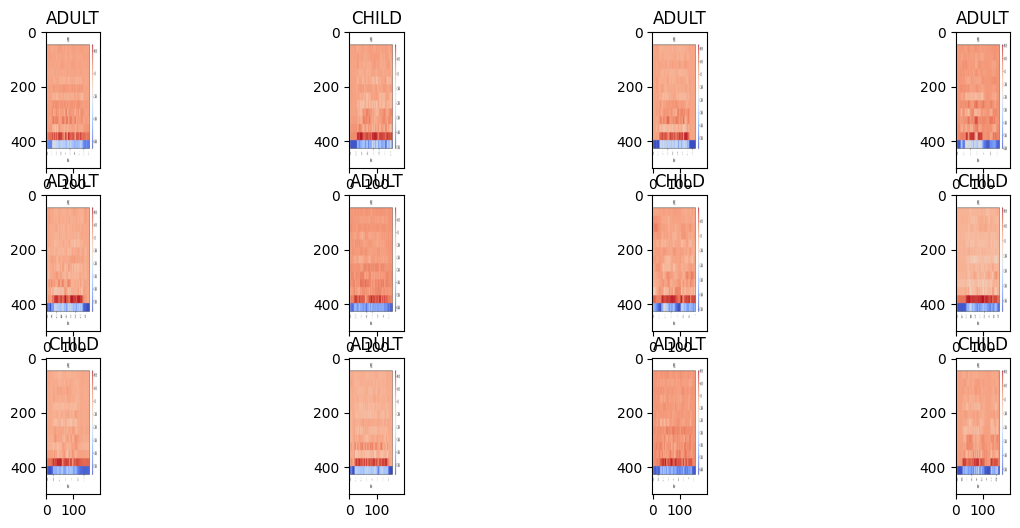

In [56]:
plt.figure(figsize=(15, 6))
for image_batch, labels_batch in dataset.take(1):
 for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[labels_batch[i]])
  plt.axis("on")

In [57]:
# Configure the train and test datasets
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [58]:
# Data preprocessing and augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(*IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [180]:
# Build the model
model = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(dataset.class_names), activation='sigmoid')
])


In [215]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [216]:

# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=10,
)

Epoch 1/10
28/28 [==============================] - 7s 168ms/step - loss: 0.3022 - accuracy: 0.8862
Epoch 2/10
28/28 [==============================] - 5s 167ms/step - loss: 0.2228 - accuracy: 0.9141
Epoch 3/10
28/28 [==============================] - 5s 168ms/step - loss: 0.2728 - accuracy: 0.9129
Epoch 4/10
28/28 [==============================] - 5s 165ms/step - loss: 0.2244 - accuracy: 0.9241
Epoch 5/10
28/28 [==============================] - 5s 168ms/step - loss: 0.1997 - accuracy: 0.9275
Epoch 6/10
28/28 [==============================] - 5s 169ms/step - loss: 0.2196 - accuracy: 0.9263
Epoch 7/10
28/28 [==============================] - 5s 169ms/step - loss: 0.1998 - accuracy: 0.9330
Epoch 8/10
28/28 [==============================] - 5s 170ms/step - loss: 0.2640 - accuracy: 0.8917
Epoch 9/10
28/28 [==============================] - 5s 167ms/step - loss: 0.2244 - accuracy: 0.9174
Epoch 10/10
28/28 [==============================] - 5s 165ms/step - loss: 0.1932 - accuracy: 0.9308

In [217]:
# Evaluate the model
scores = model.evaluate(train_ds)

28/28 [==============================] - 22s 33ms/step - loss: 0.1459 - accuracy: 0.9554


In [218]:
# Evaluate the model
scores = model.evaluate(test_ds)


4/4 [==============================] - 0s 32ms/step - loss: 0.1553 - accuracy: 0.9519


1/1 [==============================] - 0s 311ms/step


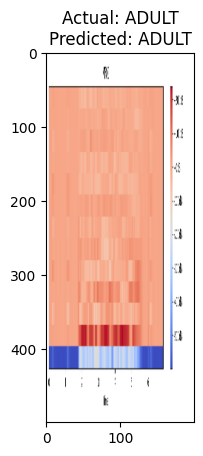

1/1 [==============================] - 0s 54ms/step


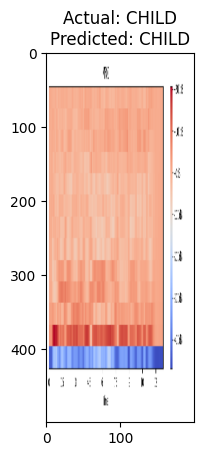

1/1 [==============================] - 0s 39ms/step


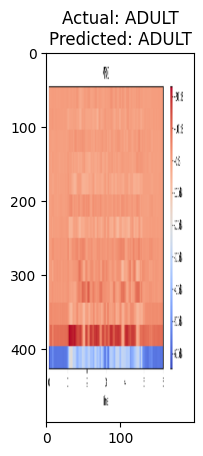

1/1 [==============================] - 0s 31ms/step


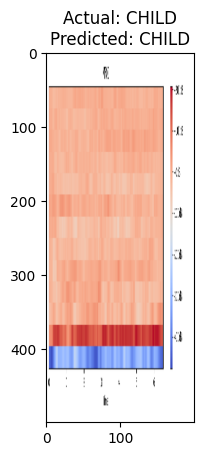

1/1 [==============================] - 0s 93ms/step


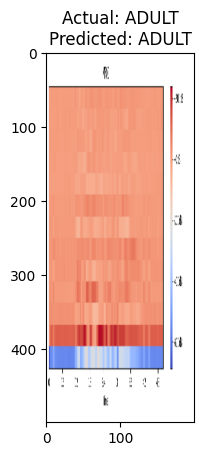

1/1 [==============================] - 0s 41ms/step


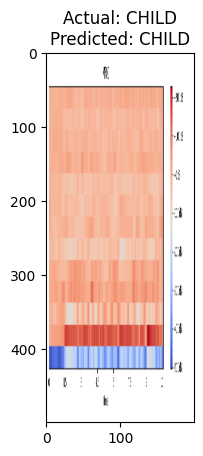

1/1 [==============================] - 0s 27ms/step


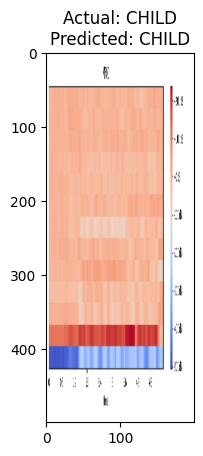

1/1 [==============================] - 0s 25ms/step


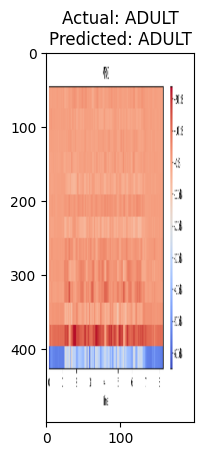

1/1 [==============================] - 0s 23ms/step


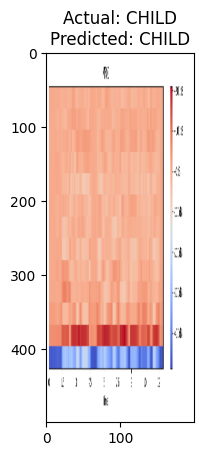

1/1 [==============================] - 0s 20ms/step


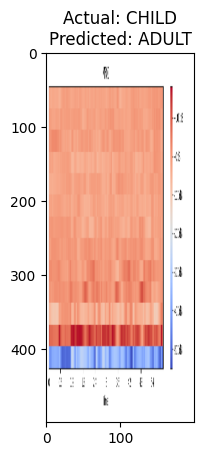

1/1 [==============================] - 0s 21ms/step


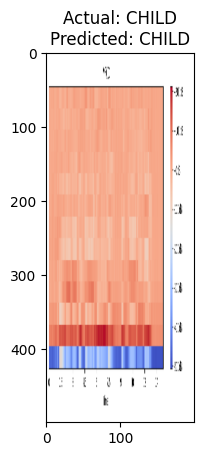

1/1 [==============================] - 0s 22ms/step


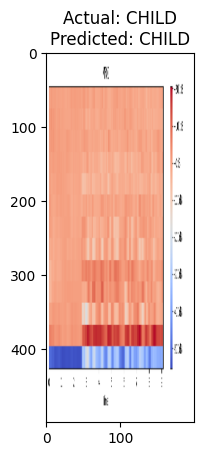

1/1 [==============================] - 0s 24ms/step


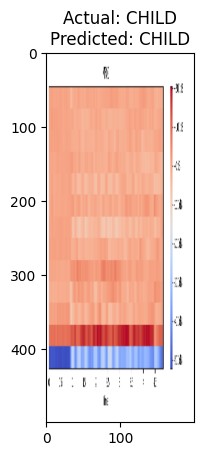

1/1 [==============================] - 0s 21ms/step


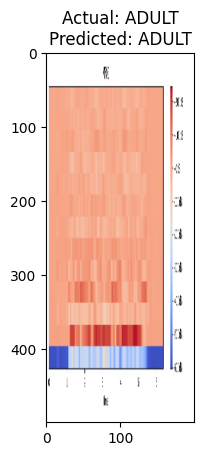

1/1 [==============================] - 0s 21ms/step


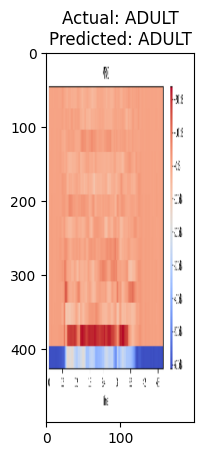

1/1 [==============================] - 0s 20ms/step


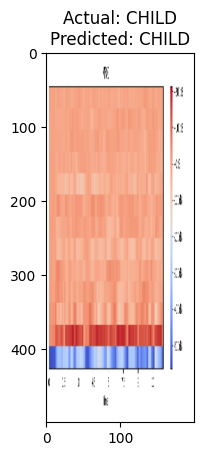

1/1 [==============================] - 0s 22ms/step


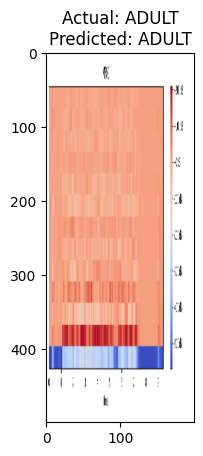

1/1 [==============================] - 0s 22ms/step


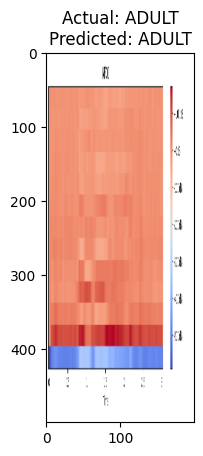

1/1 [==============================] - 0s 22ms/step


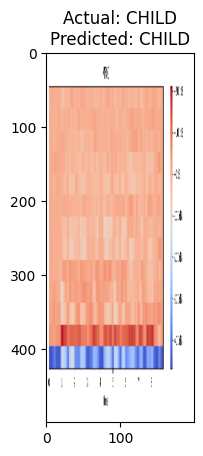

1/1 [==============================] - 0s 24ms/step


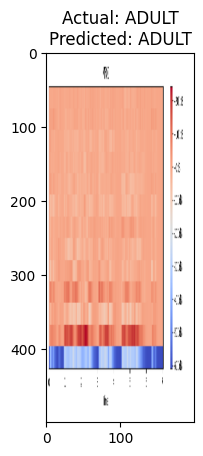

1/1 [==============================] - 0s 26ms/step


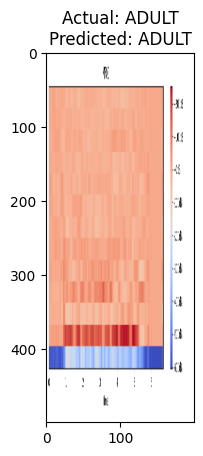

1/1 [==============================] - 0s 20ms/step


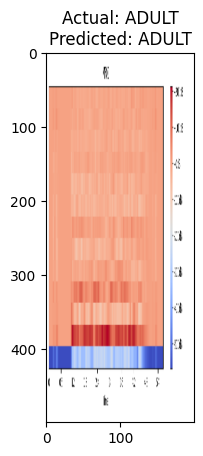

1/1 [==============================] - 0s 20ms/step


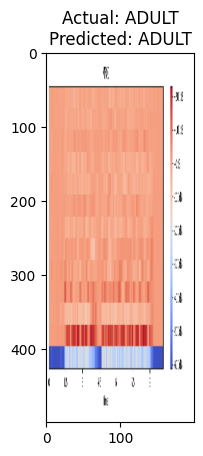

1/1 [==============================] - 0s 22ms/step


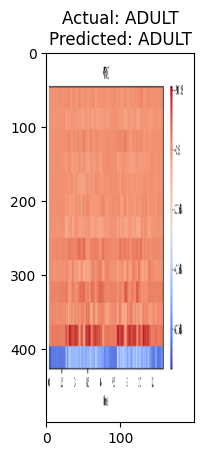

1/1 [==============================] - 0s 27ms/step


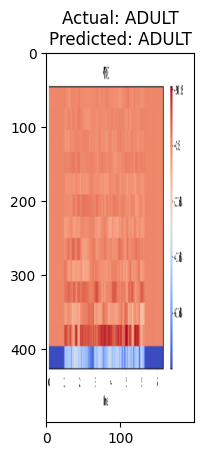

1/1 [==============================] - 0s 21ms/step


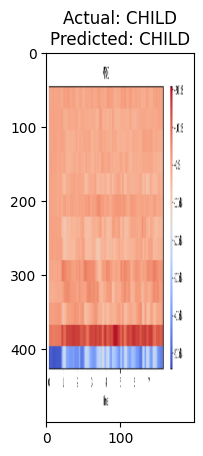

1/1 [==============================] - 0s 20ms/step


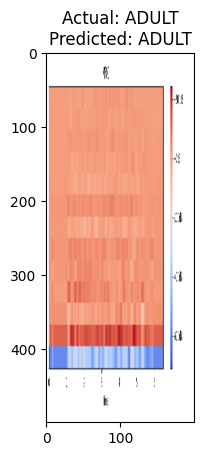

1/1 [==============================] - 0s 20ms/step


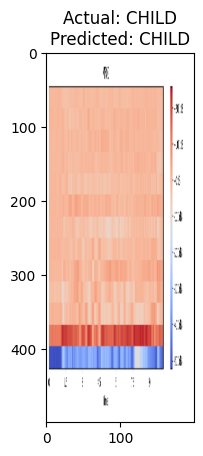

1/1 [==============================] - 0s 21ms/step


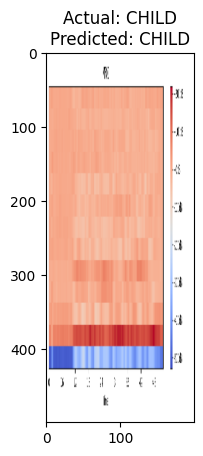

1/1 [==============================] - 0s 21ms/step


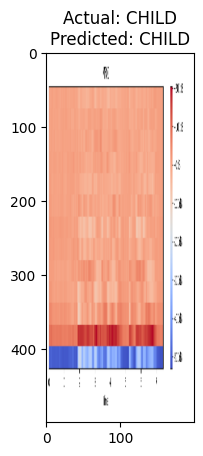

1/1 [==============================] - 0s 24ms/step


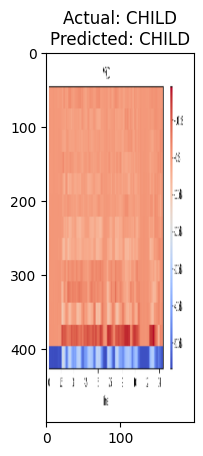

1/1 [==============================] - 0s 28ms/step


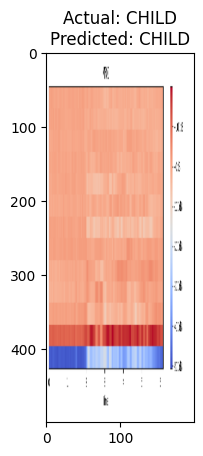

In [219]:
# Make predictions
for images, labels in test_ds.take(1):
    for i in range(len(images)):
        image = images[i]
        label = labels[i]
        prediction = model.predict(tf.expand_dims(image, 0))
        predicted_class = dataset.class_names[prediction.argmax()]
        actual_class = dataset.class_names[label]
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        plt.show()

In [220]:
scores

[0.1552799791097641, 0.9519230723381042]

In [221]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


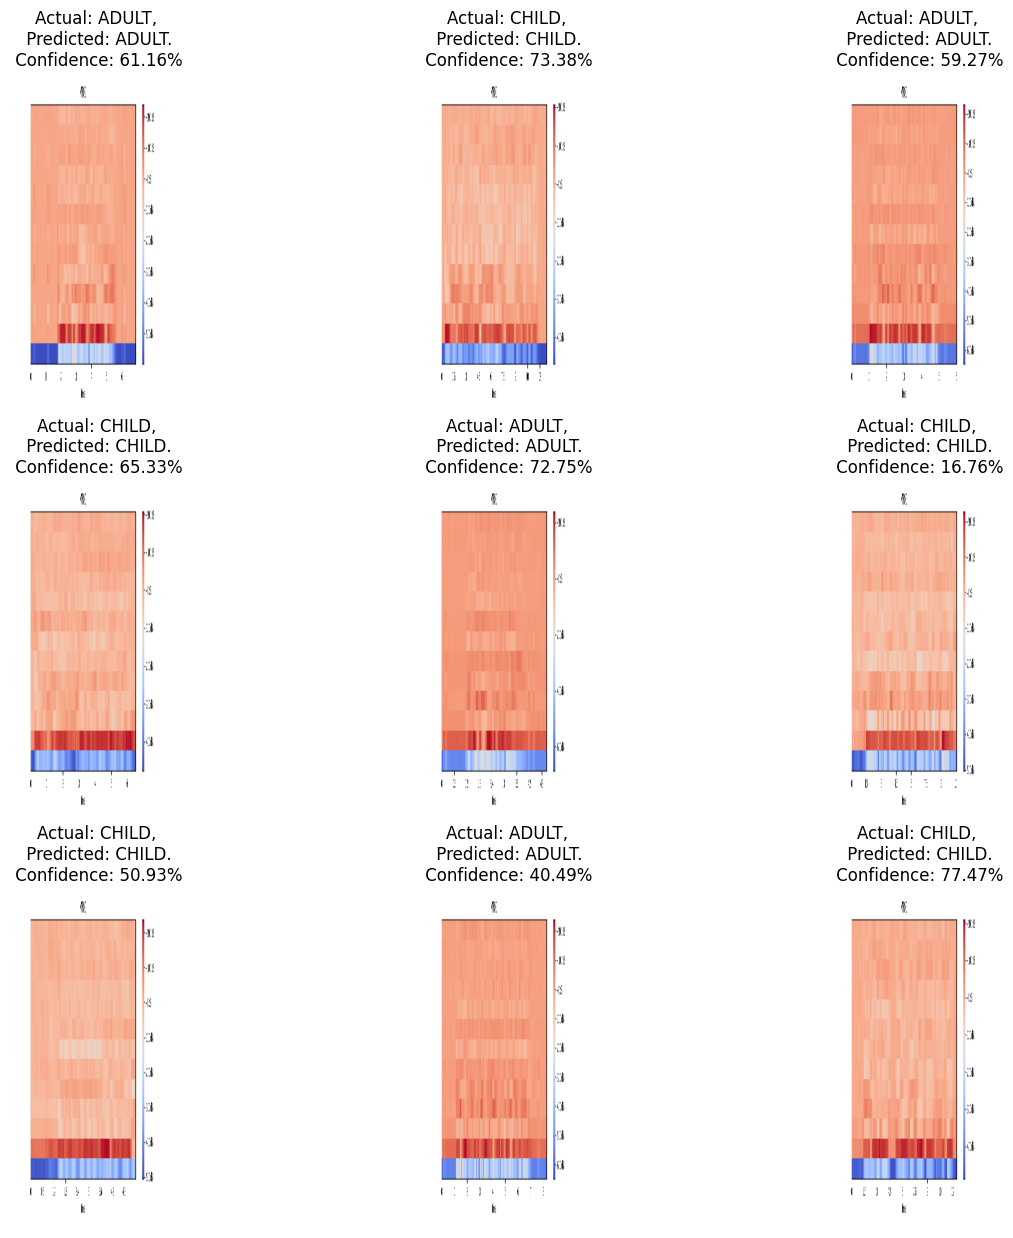

In [223]:
import numpy as np
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      predicted_class, confidence = predict(model, images[i].numpy())
      actual_class = class_names[labels[i]]
      plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
      plt.axis("off")

In [224]:
model.save('2D_CNN_MFCC.h5')